In [1]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data=pd.read_csv('startup.csv', encoding='latin')
print('Shape:', data.shape)

data

Shape: (923, 46)


,Unnamed: 0,state code,latitude,longitude,zip code,id,city,name,founded at,first funding at,...,object id,has VC,has angel,has round A,has round B,has round C,has round D,avg participants,is top 500,status
0,1005,2,42.358880,-71.056820,250,811,173,75,15,295,...,811,0,1,0,0,0,0,1.0000,0,1
1,204,2,37.238916,-121.973718,336,170,108,781,8,216,...,170,1,0,0,1,1,1,4.7500,1,1
2,1001,2,32.901049,-117.192656,251,807,173,585,106,278,...,807,0,0,1,0,0,0,4.0000,1,1
3,738,2,37.320309,-122.050040,333,592,55,712,10,218,...,592,0,0,0,1,1,1,3.3333,1,1
4,1002,2,37.779281,-122.419236,295,808,174,351,183,490,...,808,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,2,37.740594,-122.376471,296,288,174,154,17,483,...,288,0,0,1,0,0,0,6.0000,1,1
919,721,12,42.504817,-71.195611,45,577,35,622,6,291,...,577,1,0,0,1,0,0,2.6667,1,0
920,557,2,37.408261,-122.015920,290,445,191,556,7,419,...,445,0,0,0,0,0,1,8.0000,1,0
921,589,2,37.556732,-122.288378,314,468,174,134,17,104,...,468,0,0,1,1,0,0,1.0000,1,1


## Understand the dataset

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state code                923 non-null    int64  
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip code                  923 non-null    int64  
 5   id                        923 non-null    int64  
 6   city                      923 non-null    int64  
 7   name                      923 non-null    int64  
 8   founded at                923 non-null    int64  
 9   first funding at          923 non-null    int64  
 10  last funding at           923 non-null    int64  
 11  age first funding year    923 non-null    float64
 12  age last funding year     923 non-null    float64
 13  age first milestone year  923 non-null    float64
 14  age last m

In [3]:
display(data.describe())

,Unnamed: 0,state code,latitude,longitude,zip code,id,city,name,founded at,first funding at,...,object id,has VC,has angel,has round A,has round B,has round C,has round D,avg participants,is top 500,status
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,10.319610,38.517442,-103.539212,211.901408,460.444204,125.405200,460.673889,56.796316,269.306609,...,460.444204,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804
std,333.585431,10.705925,3.741497,22.394167,116.299365,266.163716,59.380428,266.210742,64.249950,174.688344,...,266.163716,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222
min,1.000000,0.000000,25.752358,-122.756956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,283.500000,2.000000,37.388869,-122.198732,101.500000,230.500000,77.500000,230.500000,12.000000,116.000000,...,230.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,577.000000,2.000000,37.779281,-118.374037,263.000000,460.000000,135.000000,461.000000,16.000000,258.000000,...,460.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000
75%,866.500000,23.000000,40.730646,-77.214731,300.000000,690.500000,174.000000,690.500000,102.500000,422.500000,...,690.500000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,1153.000000,34.000000,59.335232,18.057121,381.000000,921.000000,220.000000,921.000000,216.000000,584.000000,...,921.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


# if there are missing data, fill it with the mean value (or other value

In [4]:
data.isnull().sum()

Unnamed: 0                  0
state code                  0
latitude                    0
longitude                   0
zip code                    0
id                          0
city                        0
name                        0
founded at                  0
first funding at            0
last funding at             0
age first funding year      0
age last funding year       0
age first milestone year    0
age last milestone year     0
relationships               0
funding rounds              0
funding total usd           0
milestones                  0
state code 1                0
is CA                       0
is NY                       0
is MA                       0
is TX                       0
is otherstate               0
category code               0
is software                 0
is web                      0
is mobile                   0
is enterprise               0
is advertising              0
is games video              0
is ecommerce                0
is biotech

In [5]:
## Mean = data['latitude'].mean()
## data['latitude'] = data['latitude'].fillna(Mean)

# Categorical variable move

In [6]:
##data['feature'] = data['feature'].replace({'old1':'new1', 'old2': 'new2'})


# =====================================================

# See the target variable distribution

## target variable is class type

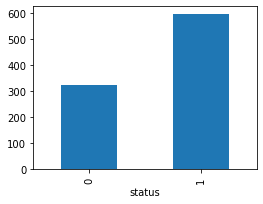

In [7]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=data.groupby('status').size()
GroupedData.plot(kind='bar', figsize=(4,3))


# continus variable or categorical variable

In [8]:
data.nunique()

Unnamed: 0                  923
state code                   35
latitude                    652
longitude                   651
zip code                    382
id                          922
city                        221
name                        922
founded at                  217
first funding at            585
last funding at             680
age first funding year      634
age last funding year       756
age first milestone year    471
age last milestone year     585
relationships                41
funding rounds                9
funding total usd           505
milestones                    8
state code 1                 35
is CA                         2
is NY                         2
is MA                         2
is TX                         2
is otherstate                 2
category code                35
is software                   2
is web                        2
is mobile                     2
is enterprise                 2
is advertising                2
is games

In [9]:
Feature_names=data.columns[:-1]
Target=data.columns[-1]

Continuous_variables=[]
Categorical_variables=[]

a=data.nunique()
for x in Feature_names:
    if a[x]>30:
        Continuous_variables.append(x)
    else:
        Categorical_variables.append(x)

print('Continuous_variables:',Continuous_variables)
print('Categorical_varialbes:',Categorical_variables)
print('Target:',Target)



Continuous_variables: ['Unnamed: 0', 'state code', 'latitude', 'longitude', 'zip code', 'id', 'city', 'name', 'founded at', 'first funding at', 'last funding at', 'age first funding year', 'age last funding year', 'age first milestone year', 'age last milestone year', 'relationships', 'funding total usd', 'state code 1', 'category code', 'object id', 'avg participants']
Categorical_varialbes: ['funding rounds', 'milestones', 'is CA', 'is NY', 'is MA', 'is TX', 'is otherstate', 'is software', 'is web', 'is mobile', 'is enterprise', 'is advertising', 'is games video', 'is ecommerce', 'is biotech', 'is consulting', 'is other category', 'has VC', 'has angel', 'has round A', 'has round B', 'has round C', 'has round D', 'is top 500']
Target: status


# Visual exploration

# distribution of a single variable

## for categorical variable

In [10]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])


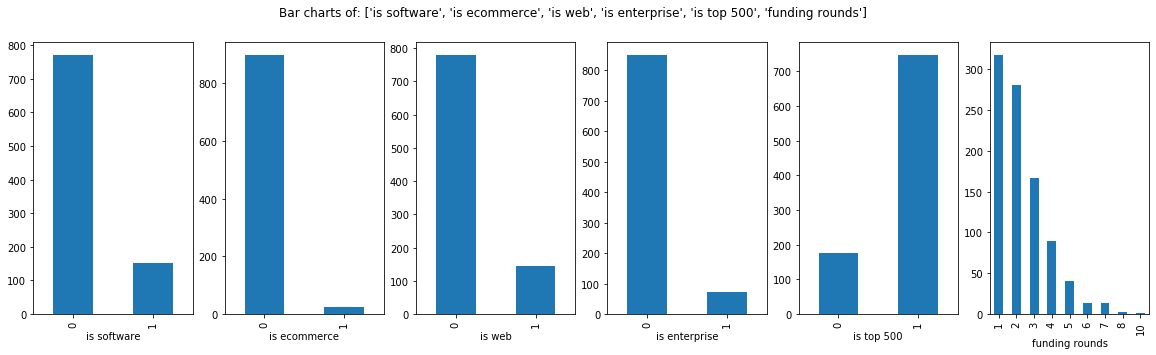

In [11]:
PlotBarCharts(inpData=data, 
              colsToPlot=['is software', 'is ecommerce', 'is web','is enterprise','is top 500','funding rounds'])

## for continuous variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b35a9c820>,
      dtype=object)

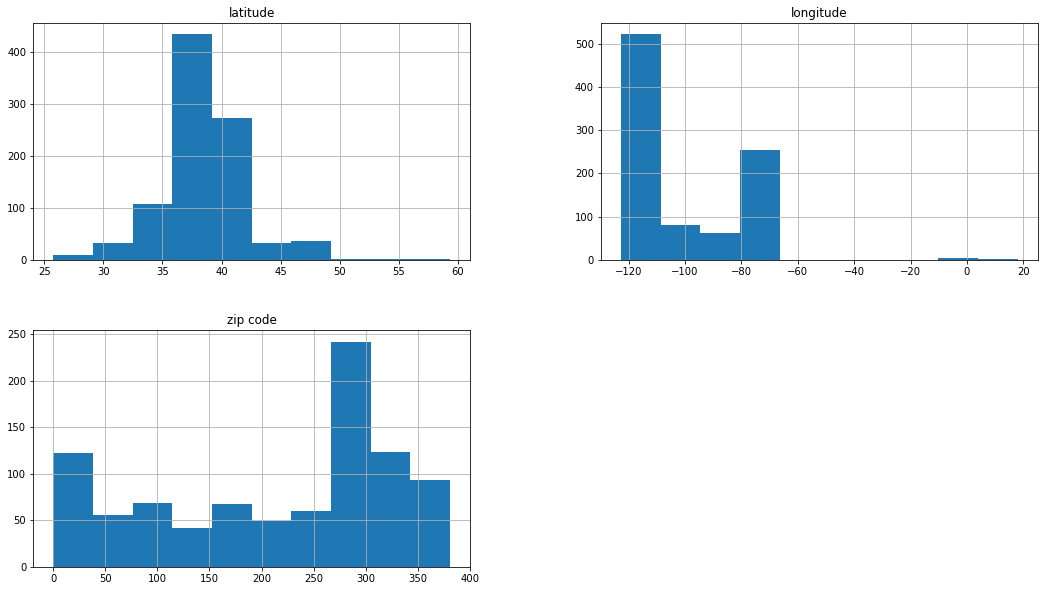

In [12]:
data.hist(['latitude','longitude','zip code'], figsize=(18,10))

# Outlier treatement
## Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.
## There are below two options to treat outliers in the data.
## Option-1: Delete the outlier Records. Only if there are just few rows lost.
## Option-2: Impute the outlier values with a logical business value


In [13]:
## we do not do it here

# =====================================================

# Visual exploration of relationship between feature and target and the feature selection


## Continuous Vs Continuous ---- Scatter Plot
## Categorical Vs Continuous---- Box Plot
## Categorical Vs Categorical---- Grouped Bar Plots

## Relationship exploration: Categorical Vs Continuous -- Box Plots

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or 

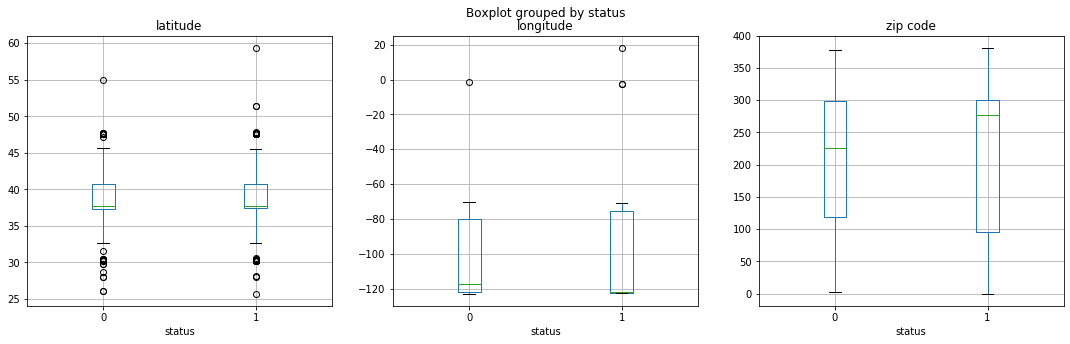

In [14]:
# Box plots for Categorical Target Variable "GoodCredit" and continuous predictors
ContinuousColsList=['latitude','longitude','zip code']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    data.boxplot(column=PredictorCol, by=Target, figsize=(5,5), vert=True, ax=PlotCanvas[i])

## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [15]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [16]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=Continuous_variables
Selected_continuous_variables=FunctionAnova(inpData=data, TargetVariable=Target, ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Unnamed: 0 is correlated with status | P-Value: 0.03684673772034693
state code is correlated with status | P-Value: 0.01728854244550251
latitude is NOT correlated with status | P-Value: 0.15753920268708077
longitude is NOT correlated with status | P-Value: 0.27335677979177514
zip code is NOT correlated with status | P-Value: 0.5143986135758054
id is correlated with status | P-Value: 0.039173827799693646
city is NOT correlated with status | P-Value: 0.9897416665486715
name is NOT correlated with status | P-Value: 0.48335820637325466
founded at is NOT correlated with status | P-Value: 0.4302296109445465
first funding at is NOT correlated with status | P-Value: 0.47752837662049497
last funding at is NOT correlated with status | P-Value: 0.4712705687959049
age first funding year is correlated with status | P-Value: 0.02155524952150028
age last funding year is correlated with status | P-Value: 0.02508927821854483
age first milestone year is correlated with status

## Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

In [17]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=data['is top 500'], columns=data[Target])
CrossTabResult

status,0,1
is top 500,,
0,116,60
1,210,537


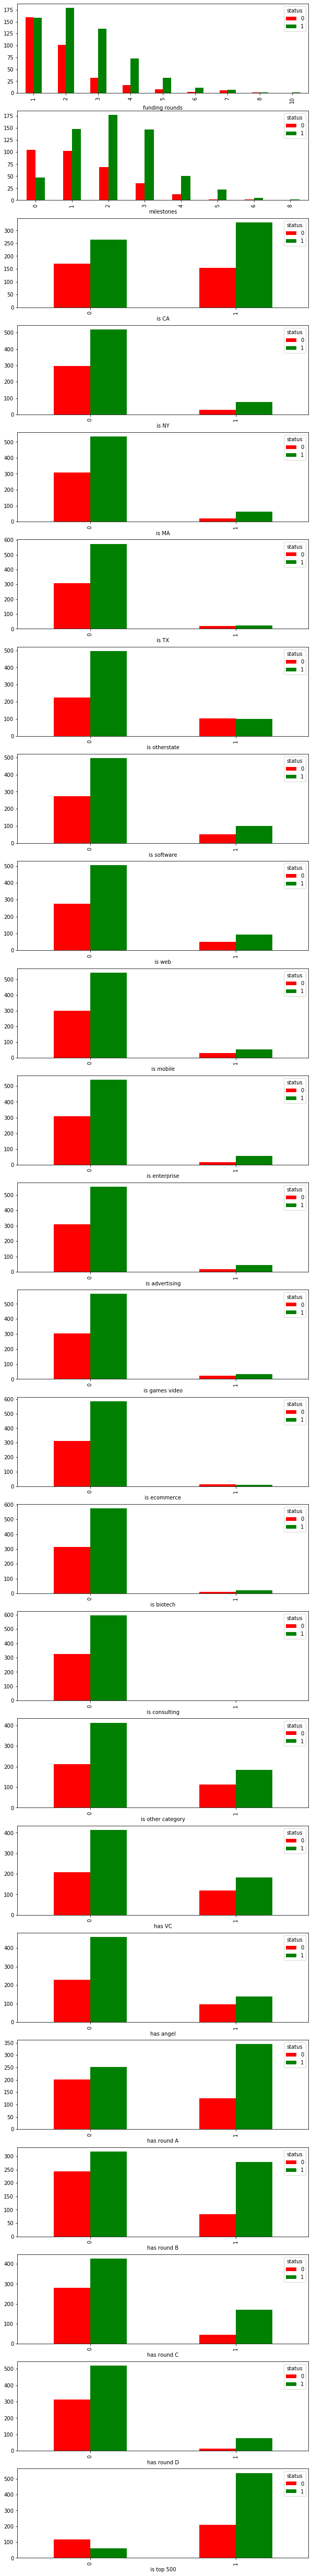

In [18]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=Categorical_variables

fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=data[CategoricalCol], columns=data[Target])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])

## Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test¶


In [19]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [20]:
CategoricalVariables=Categorical_variables

# Calling the function
Selected_categorical_variables=FunctionChisq(inpData=data, 
              TargetVariable=Target,
              CategoricalVariablesList= CategoricalVariables)

funding rounds is correlated with status | P-Value: 1.164901940140313e-11
milestones is correlated with status | P-Value: 3.803915044926012e-23
is CA is correlated with status | P-Value: 0.022789093473687905
is NY is NOT correlated with status | P-Value: 0.08639401277936055
is MA is correlated with status | P-Value: 0.018136532907521798
is TX is NOT correlated with status | P-Value: 0.22577323695928708
is otherstate is correlated with status | P-Value: 4.3395831445030466e-07
is software is NOT correlated with status | P-Value: 0.7756390212496116
is web is NOT correlated with status | P-Value: 1.0
is mobile is NOT correlated with status | P-Value: 0.9210760311541045
is enterprise is correlated with status | P-Value: 0.03454233888250984
is advertising is NOT correlated with status | P-Value: 0.22628462339369138
is games video is NOT correlated with status | P-Value: 0.5239235236631415
is ecommerce is correlated with status | P-Value: 0.04757087313965339
is biotech is NOT correlated with 

## so we can select final features

In [21]:
print('Continuous variables:',Selected_continuous_variables)
print('Categorical variables',Selected_categorical_variables)

Continuous variables: ['Unnamed: 0', 'state code', 'id', 'age first funding year', 'age last funding year', 'age first milestone year', 'age last milestone year', 'relationships', 'state code 1', 'object id', 'avg participants']
Categorical variables ['funding rounds', 'milestones', 'is CA', 'is MA', 'is otherstate', 'is enterprise', 'is ecommerce', 'has angel', 'has round A', 'has round B', 'has round C', 'has round D', 'is top 500']


In [32]:
Selected_variables=Selected_continuous_variables+Selected_categorical_variables

Data=data[Selected_variables].copy()

# Converting the binary nominal variable to numeric using 1/0 mapping

In [33]:
## data['feature'].replace({'A':1, 'B':0}, inplace=True)
Data

,Unnamed: 0,state code,id,age first funding year,age last funding year,age first milestone year,age last milestone year,relationships,state code 1,object id,...,is MA,is otherstate,is enterprise,is ecommerce,has angel,has round A,has round B,has round C,has round D,is top 500
0,1005,2,811,2.2493,3.0027,4.6685,6.7041,3,2,811,...,0,0,0,0,1,0,0,0,0,0
1,204,2,170,5.1260,9.9973,7.0055,7.0055,9,2,170,...,0,0,1,0,0,0,1,1,1,1
2,1001,2,807,1.0329,1.0329,1.4575,2.2055,5,2,807,...,0,0,0,0,0,1,0,0,0,1
3,738,2,592,3.1315,5.3151,6.0027,6.0027,5,2,592,...,0,0,0,0,0,0,1,1,1,1
4,1002,2,808,0.0000,1.6685,0.0384,0.0384,2,2,808,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,2,288,0.5178,0.5178,0.5808,4.5260,9,2,288,...,0,0,0,0,0,1,0,0,0,1
919,721,12,577,7.2521,9.2274,6.0027,6.0027,1,12,577,...,1,0,0,0,0,0,1,0,0,1
920,557,2,445,8.4959,8.4959,9.0055,9.0055,5,2,445,...,0,0,0,0,0,0,0,0,1,1
921,589,2,468,0.7589,2.8329,0.7589,3.8356,12,2,468,...,0,0,0,0,0,1,1,0,0,1


# Converting nominal variables to numeric using get_dummies()¶


In [34]:
## Data_new=Data[Selected_variables]
## Data_Numeric=pd.get_dummies(Data_new)
## Data_Numeric[Target]=data[Target]

In [36]:
Data[Target]=data[Target]
Data

,Unnamed: 0,state code,id,age first funding year,age last funding year,age first milestone year,age last milestone year,relationships,state code 1,object id,...,is otherstate,is enterprise,is ecommerce,has angel,has round A,has round B,has round C,has round D,is top 500,status
0,1005,2,811,2.2493,3.0027,4.6685,6.7041,3,2,811,...,0,0,0,1,0,0,0,0,0,1
1,204,2,170,5.1260,9.9973,7.0055,7.0055,9,2,170,...,0,1,0,0,0,1,1,1,1,1
2,1001,2,807,1.0329,1.0329,1.4575,2.2055,5,2,807,...,0,0,0,0,1,0,0,0,1,1
3,738,2,592,3.1315,5.3151,6.0027,6.0027,5,2,592,...,0,0,0,0,0,1,1,1,1,1
4,1002,2,808,0.0000,1.6685,0.0384,0.0384,2,2,808,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,2,288,0.5178,0.5178,0.5808,4.5260,9,2,288,...,0,0,0,0,1,0,0,0,1,1
919,721,12,577,7.2521,9.2274,6.0027,6.0027,1,12,577,...,0,0,0,0,0,1,0,0,1,0
920,557,2,445,8.4959,8.4959,9.0055,9.0055,5,2,445,...,0,0,0,0,0,0,0,1,1,0
921,589,2,468,0.7589,2.8329,0.7589,3.8356,12,2,468,...,0,0,0,0,1,1,0,0,1,1


# Correlation

In [56]:
##pip install seaborn

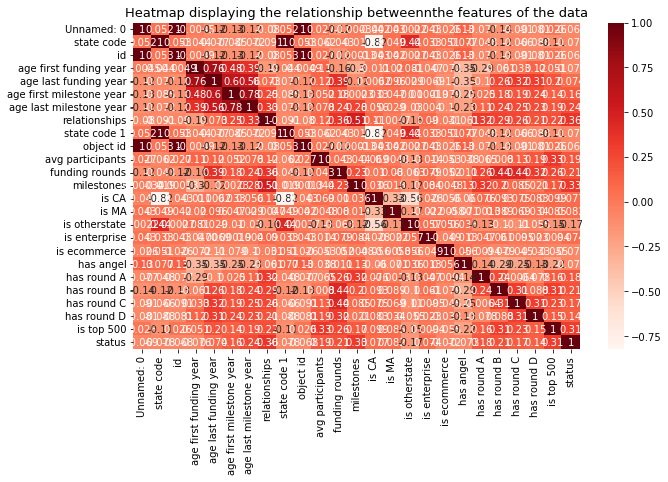

In [37]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(Data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

In [38]:
### too many columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b2894ffa0>,
      dtype=object)

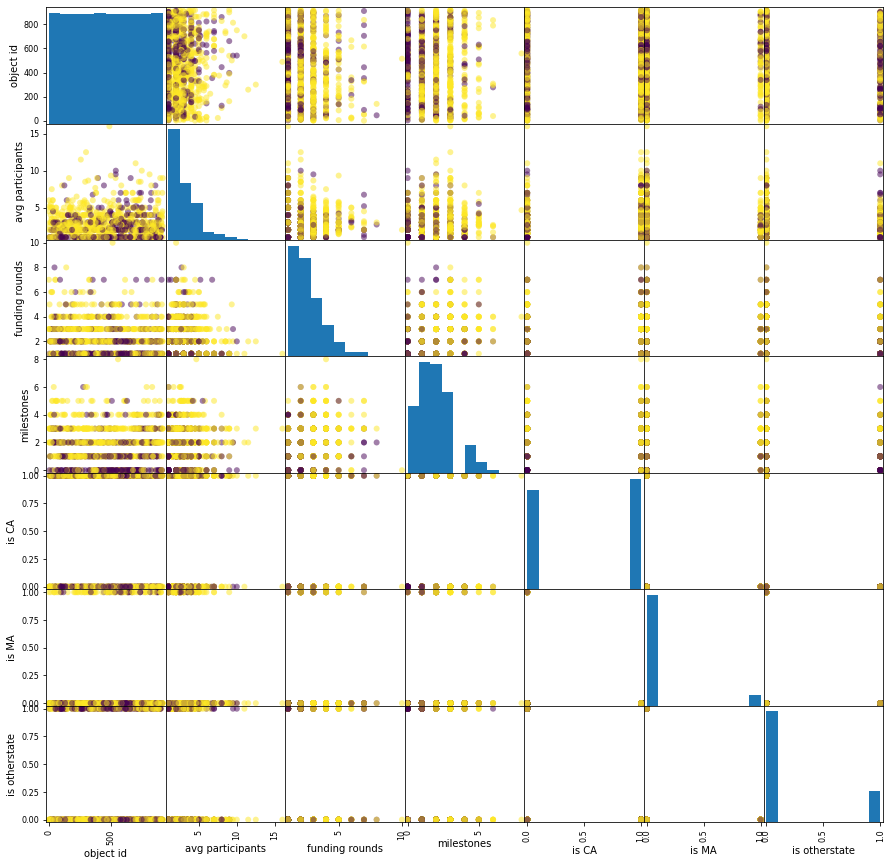

In [54]:
Data_test=Data[[ 'object id',
 'avg participants',
 'funding rounds',
 'milestones',
 'is CA',
 'is MA',
 'is otherstate']]

pd.plotting.scatter_matrix(Data_test, c=Data[Target], figsize=(15,15),marker='o')

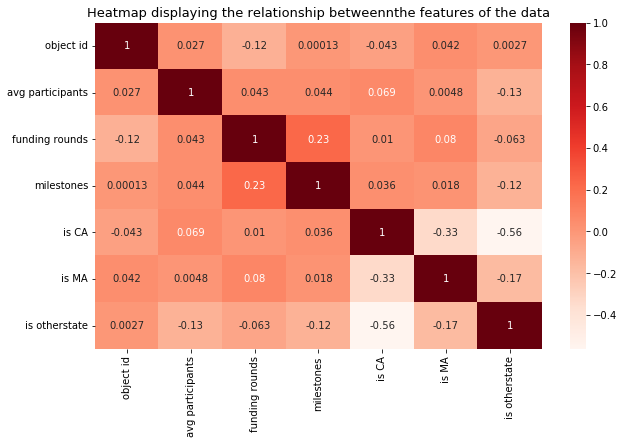

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(Data_test.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()